<center><img src="images/trojan-horse.png" alt="drawing" width="7500" style="background-color:white; padding:1em;" /></center> <br/>

<div class="alert alert-block alert-success"><span style="color:blue"><h1>Trojan Detection through ML</h1></span></div>
<div class="alert alert-block alert-warning">
<span style="color:blue"><h2>Using Ensemble Learning</h2></span></div>

Ensemble methods create a strong model by combining the predictions of multiple weak models (also known as weak learners or base estimators) that are built with a given dataset and a given learning algorithm.

Three major kinds of meta-algorithms that aims at combining weak learners:

- <span style="color:red"><b>Bagging,</b></span> that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process
- <span style="color:red"><b>Boosting,</b></span> that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy
- <span style="color:red"><b>Stacking,</b></span> that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

----

__Trojan Detection Dataset__

In this project, the CulinaryML team will work with historical trojan detection data in the [Trojan Detection Dataset](https://www.kaggle.com/datasets/subhajournal/trojan-detection/code). The target field of the dataset (**Class**) is the outcome of detection: <span style="color:red"><b>1 for Trojan and 0 for Benign.</b></span> Multiple features are used in the dataset.

__Dataset schema:__
<span style="color:blue">
- __ID:__ Unique ID of the Packet
- __Flow ID:__ Unique ID of the Packet Flow
- __Source IP:__ Source IP address
- __Source Port:__ Source TCP/User Datagram Protocol (UDP) ports
- __Destination IP:__ Destination IP address
- __Destination Port:__ Destination TCP/User Datagram Protocol (UDP) ports
- __Protocol:__ TCP flags and encapsulated protocol (TCP/UDP)
- __Flow Duration:__ Duration of Packet Flow
- __Total Fwd Packets:__ Number of Forward Packets
- __Total Backward Packets:__  Number of Backward Packet
- __Total Length of Fwd Packets:__ Length of Forward Packet
- __Total Length of Bwd Packets:__ Length of Backward Packet
- __Fwd Packet Length Max:__ Length of Forward Packet (Max)
- __Fwd Packet Length Min:__ Length of Forward Packet (Min)
- __Fwd Packet Length Mean:__ Length of Forward Packet (Mean)
- __Fwd Packet Length Std:__ Length of Forward Packet (STD)
- __Bwd Packet Length Max:__ Length of Backward Packet (Max)
- __Bwd Packet Length Min:__ Length of Backward Packet (Min)
- __Bwd Packet Length Mean:__ Length of Backward Packet (Mean)
- __Bwd Packet Length Std:__ Length of Backward Packet (STD)
- __Fwd IAT Total:__ IAT Total
- __Fwd Header Length:__ Length of Forward Header
- __Bwd Header Length:__ Length of Backward Header
- __Min Packet Length:__ Packet Length (Min)
- __Max Packet Length:__ Packet Length (Max)
- __Packet Length Mean:__ Packet Length (Mean)
- __Packet Length Std:__ Packet Length (STD)
- __Packet Length Variance:__ Packet Length (Variance)
- __Average Packet Size:__ Packet Size
- __Avg Fwd Segment Size:__ Forward Segment Size
- __Avg Bwd Segment Size:__ Backward Segment Size
- __Fwd Header Length.1:__ Forward Header Leader
- __Class:__ Trojan or Benign
</span>
----

<center><img src="images/culinaryML.png" alt="drawing" width="500" style="background-color:white; padding:1em;" /></center>
<div class="alert alert-block alert-success">
<h1><span style="color:blue">CulinaryML Process</span></h1></div>

- [Data Collection](#Data-Collection)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Preparation](#Data-Preparation)
- [Model Building](#Model-Building)
- [Bagging](#Bagging)
- [Random Forest](#Random-Forest)
- [Boosting](#Boosting)
- [Model Evaluation](#Model-Evaluation)

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue"> Data Collection</span></h1></div>

Before CulinaryML builds a model, we need to collect the data. 

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
import re, string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("data/Trojan_Detection_modified.csv",sep=",")
pd.set_option("display.max_columns", None)

print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (177482, 33)


In [4]:
df.head(20)

ID                                 Flow ID      Source IP  \
0    73217     10.42.0.42-121.14.255.84-49975-80-6     10.42.0.42   
1    72089   172.217.6.226-10.42.0.42-443-49169-17     10.42.0.42   
2    96676        10.42.0.1-10.42.0.42-53-37749-17     10.42.0.42   
3    42891        10.42.0.1-10.42.0.42-53-41352-17     10.42.0.42   
4   169326   10.42.0.151-107.22.241.77-44353-443-6    10.42.0.151   
5    34510        10.42.0.211-10.42.0.1-6021-53-17    10.42.0.211   
6    59506     10.42.0.42-74.217.63.24-38871-443-6     10.42.0.42   
7    98047    10.42.0.42-66.231.239.96-49387-443-6     10.42.0.42   
8    44044        10.42.0.1-10.42.0.42-53-34743-17     10.42.0.42   
9    84350    172.217.10.1-10.42.0.151-443-51786-6   172.217.10.1   
10  140308    180.76.184.128-10.42.0.42-80-47733-6     10.42.0.42   
11  149339    172.217.9.227-10.42.0.42-443-38191-6     10.42.0.42   
12   90887   10.42.0.42-112.80.248.220-39888-443-6     10.42.0.42   
13   30597       10.42.0.211-10.42.0.1-62945-53-17    10.42.0.211   
14  114034     140.205.230.8-10.42.0.42-80-35291-6  140.205.230.8   
15   98060    10.42.0.42-66.198.24.250-35120-443-6     10.42.0.42   
16  139010    216.58.217.68-10.42.0.42-443-46251-6     10.42.0.42   
17   13077  172.217.12.162-10.42.0.211-443-60065-6    10.42.0.211   
18  124498        10.42.0.1-10.42.0.42-53-64235-17     10.42.0.42   
19  116573    202.77.129.230-10.42.0.42-80-56764-6     10.42.0.42   

    Source Port  Destination IP  Destination Port  Protocol  Flow Duration  \
0         49975   121.14.255.84                80         6       10743584   
1         49169   172.217.6.226               443        17         254217   
2         37749       10.42.0.1                53        17        1023244   
3         41352       10.42.0.1                53        17         286483   
4         44353   107.22.241.77               443         6       65633087   
5          6021       10.42.0.1                53        17         251336   
6         38871    74.217.63.24               443         6           3096   
7         49387   66.231.239.96               443         6            473   
8         34743       10.42.0.1                53        17         557409   
9           443     10.42.0.151             51786         6            314   
10        47733  180.76.184.128                80         6         518061   
11        38191   172.217.9.227               443         6       46143837   
12        39888  112.80.248.220               443         6       34659660   
13        62945       10.42.0.1                53        17         663034   
14           80      10.42.0.42             35291         6              7   
15        35120   66.198.24.250               443         6        4745734   
16        46251   216.58.217.68               443         6       72918838   
17        60065  172.217.12.162               443         6         566018   
18        64235       10.42.0.1                53        17           1482   
19        56764  202.77.129.230                80         6        4542518   

    Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
0                   4                       4                          372   
1                   6                       7                         3191   
2                   1                       1                           30   
3                   1                       1                           40   
4                  12                      10                          767   
5                   1                       1                           37   
6                   3                       0                            0   
7                   1                       2                           46   
8                   1                       1                           25   
9                   2                       0                           55   
10                  3                       3                

Convert Propose Target Feature **(Class)** to Binary and Rename to **"Malware Type"** 

In [5]:
d = {"Benign": 0, "Trojan": 1}
df["Malware Type"] = df["Class"].map(d)
df.head(20)

ID                                 Flow ID      Source IP  \
0    73217     10.42.0.42-121.14.255.84-49975-80-6     10.42.0.42   
1    72089   172.217.6.226-10.42.0.42-443-49169-17     10.42.0.42   
2    96676        10.42.0.1-10.42.0.42-53-37749-17     10.42.0.42   
3    42891        10.42.0.1-10.42.0.42-53-41352-17     10.42.0.42   
4   169326   10.42.0.151-107.22.241.77-44353-443-6    10.42.0.151   
5    34510        10.42.0.211-10.42.0.1-6021-53-17    10.42.0.211   
6    59506     10.42.0.42-74.217.63.24-38871-443-6     10.42.0.42   
7    98047    10.42.0.42-66.231.239.96-49387-443-6     10.42.0.42   
8    44044        10.42.0.1-10.42.0.42-53-34743-17     10.42.0.42   
9    84350    172.217.10.1-10.42.0.151-443-51786-6   172.217.10.1   
10  140308    180.76.184.128-10.42.0.42-80-47733-6     10.42.0.42   
11  149339    172.217.9.227-10.42.0.42-443-38191-6     10.42.0.42   
12   90887   10.42.0.42-112.80.248.220-39888-443-6     10.42.0.42   
13   30597       10.42.0.211-10.42.0.1-62945-53-17    10.42.0.211   
14  114034     140.205.230.8-10.42.0.42-80-35291-6  140.205.230.8   
15   98060    10.42.0.42-66.198.24.250-35120-443-6     10.42.0.42   
16  139010    216.58.217.68-10.42.0.42-443-46251-6     10.42.0.42   
17   13077  172.217.12.162-10.42.0.211-443-60065-6    10.42.0.211   
18  124498        10.42.0.1-10.42.0.42-53-64235-17     10.42.0.42   
19  116573    202.77.129.230-10.42.0.42-80-56764-6     10.42.0.42   

    Source Port  Destination IP  Destination Port  Protocol  Flow Duration  \
0         49975   121.14.255.84                80         6       10743584   
1         49169   172.217.6.226               443        17         254217   
2         37749       10.42.0.1                53        17        1023244   
3         41352       10.42.0.1                53        17         286483   
4         44353   107.22.241.77               443         6       65633087   
5          6021       10.42.0.1                53        17         251336   
6         38871    74.217.63.24               443         6           3096   
7         49387   66.231.239.96               443         6            473   
8         34743       10.42.0.1                53        17         557409   
9           443     10.42.0.151             51786         6            314   
10        47733  180.76.184.128                80         6         518061   
11        38191   172.217.9.227               443         6       46143837   
12        39888  112.80.248.220               443         6       34659660   
13        62945       10.42.0.1                53        17         663034   
14           80      10.42.0.42             35291         6              7   
15        35120   66.198.24.250               443         6        4745734   
16        46251   216.58.217.68               443         6       72918838   
17        60065  172.217.12.162               443         6         566018   
18        64235       10.42.0.1                53        17           1482   
19        56764  202.77.129.230                80         6        4542518   

    Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
0                   4                       4                          372   
1                   6                       7                         3191   
2                   1                       1                           30   
3                   1                       1                           40   
4                  12                      10                          767   
5                   1                       1                           37   
6                   3                       0                            0   
7                   1                       2                           46   
8                   1                       1                           25   
9                   2                       0                           55   
10                  3                       3                

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           177482 non-null  int64  
 1   Flow ID                      177482 non-null  object 
 2   Source IP                    177482 non-null  object 
 3   Source Port                  177482 non-null  int64  
 4   Destination IP               177482 non-null  object 
 5   Destination Port             177482 non-null  int64  
 6   Protocol                     177482 non-null  int64  
 7   Flow Duration                177482 non-null  int64  
 8   Total Fwd Packets            177482 non-null  int64  
 9   Total Backward Packets       177482 non-null  int64  
 10  Total Length of Fwd Packets  177482 non-null  int64  
 11  Total Length of Bwd Packets  177482 non-null  int64  
 12  Fwd Packet Length Max        177482 non-null  int64  
 13 

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Feature Engineering</span></h1></div>

Remove unnecessary features (columns) to minimize under-fitting and over-fitting

We used some commands including the number of rows, number of columns, and some simple statistics.


In [7]:
# Feature Engineering

df.drop([
    'Flow ID',
    'Fwd Packet Length Min',
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Fwd Packet Length Min',
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Fwd IAT Total',
    'Fwd Header Length',
    'Bwd Header Length',
    'Min Packet Length',
    'Max Packet Length',
    'Packet Length Mean',
    'Packet Length Std',
    'Packet Length Variance',
    'Average Packet Size',
    'Avg Fwd Segment Size',
    'Avg Bwd Segment Size',
    'Fwd Header Length.1',
    'Class'],axis=1, inplace=True)

In [8]:
df.head(10)

ID     Source IP  Source Port Destination IP  Destination Port  \
0   73217    10.42.0.42        49975  121.14.255.84                80   
1   72089    10.42.0.42        49169  172.217.6.226               443   
2   96676    10.42.0.42        37749      10.42.0.1                53   
3   42891    10.42.0.42        41352      10.42.0.1                53   
4  169326   10.42.0.151        44353  107.22.241.77               443   
5   34510   10.42.0.211         6021      10.42.0.1                53   
6   59506    10.42.0.42        38871   74.217.63.24               443   
7   98047    10.42.0.42        49387  66.231.239.96               443   
8   44044    10.42.0.42        34743      10.42.0.1                53   
9   84350  172.217.10.1          443    10.42.0.151             51786   

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6       10743584                  4                       4   
1        17         254217                  6                       7   
2        17        1023244                  1                       1   
3        17         286483                  1                       1   
4         6       65633087                 12                      10   
5        17         251336                  1                       1   
6         6           3096                  3                       0   
7         6            473                  1                       2   
8        17         557409                  1                       1   
9         6            314                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          372                          672   
1                         3191                         5246   
2                           30                          179   
3                           40                          106   
4                          767                         5622   
5                           37                          182   
6                            0                            0   
7                           46                           31   
8                           25                           79   
9                           55                            0   

   Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                    672                      0              168.000000   
1                   1350                     30              749.428571   
2                    179                    179              179.000000   
3                    106                    106              106.000000   
4                   1448                      0              562.200000   
5                    182                    182              182.000000   
6                      0                      0                0.000000   
7                     31                      0               15.500000   
8                     79                     79               79.000000   
9                      0                      0                0.000000   

   Bwd Packet Length Std  Malware Type  
0             336.000000             1  
1             678.206423             1  
2               0.000000             0  
3               0.000000             1  
4             649.538948             0  
5               0.000000             1  
6               0.000000             1  
7              21.920310             0  
8               0.000000             1  
9               0.000000             1

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Exploratory Data Analysis (EDA)</span></h1></div>

CulinaryML takes an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

In [9]:
df.head()

ID    Source IP  Source Port Destination IP  Destination Port  \
0   73217   10.42.0.42        49975  121.14.255.84                80   
1   72089   10.42.0.42        49169  172.217.6.226               443   
2   96676   10.42.0.42        37749      10.42.0.1                53   
3   42891   10.42.0.42        41352      10.42.0.1                53   
4  169326  10.42.0.151        44353  107.22.241.77               443   

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6       10743584                  4                       4   
1        17         254217                  6                       7   
2        17        1023244                  1                       1   
3        17         286483                  1                       1   
4         6       65633087                 12                      10   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          372                          672   
1                         3191                         5246   
2                           30                          179   
3                           40                          106   
4                          767                         5622   

   Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                    672                      0              168.000000   
1                   1350                     30              749.428571   
2                    179                    179              179.000000   
3                    106                    106              106.000000   
4                   1448                      0              562.200000   

   Bwd Packet Length Std  Malware Type  
0             336.000000             1  
1             678.206423             1  
2               0.000000             0  
3               0.000000             1  
4             649.538948             0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           177482 non-null  int64  
 1   Source IP                    177482 non-null  object 
 2   Source Port                  177482 non-null  int64  
 3   Destination IP               177482 non-null  object 
 4   Destination Port             177482 non-null  int64  
 5   Protocol                     177482 non-null  int64  
 6   Flow Duration                177482 non-null  int64  
 7   Total Fwd Packets            177482 non-null  int64  
 8   Total Backward Packets       177482 non-null  int64  
 9   Total Length of Fwd Packets  177482 non-null  int64  
 10  Total Length of Bwd Packets  177482 non-null  int64  
 11  Bwd Packet Length Max        177482 non-null  int64  
 12  Bwd Packet Length Min        177482 non-null  int64  
 13 

In [11]:
df.describe()

ID    Source Port  Destination Port       Protocol  \
count  177482.000000  177482.000000     177482.000000  177482.000000   
mean    88740.500000   38633.298729       5763.328969       8.295917   
std     51234.784576   18435.832044      15155.981517       4.540501   
min         0.000000       0.000000          0.000000       0.000000   
25%     44370.250000   34156.000000         80.000000       6.000000   
50%     88740.500000   43105.500000        443.000000       6.000000   
75%    133110.750000   52135.000000        443.000000       6.000000   
max    177481.000000   65530.000000      65267.000000      17.000000   

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
count   1.774820e+05      177482.000000           177482.000000   
mean    1.163310e+07           6.743929                9.908261   
std     2.302798e+07          29.655515              106.401351   
min     2.000000e+00           1.000000                0.000000   
25%     4.690050e+04           1.000000                0.000000   
50%     4.854025e+05           2.000000                1.000000   
75%     1.062035e+07           5.000000                4.000000   
max     1.199991e+08        4502.000000            12951.000000   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
count                177482.000000                 1.774820e+05   
mean                    811.919496                 1.023884e+04   
std                    6055.745405                 1.517666e+05   
min                       0.000000                 0.000000e+00   
25%                       0.000000                 0.000000e+00   
50%                      31.000000                 3.100000e+01   
75%                     451.000000                 4.950000e+02   
max                  846614.000000                 1.868497e+07   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
count          177482.000000          177482.000000           177482.000000   
mean              350.485869              25.804775              181.393918   
std               558.214712              69.906916              319.797743   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                31.000000               0.000000               15.500000   
75%               358.000000               0.000000              174.795455   
max              1460.000000            1460.000000             1460.000000   

       Bwd Packet Length Std   Malware Type  
count          177482.000000  177482.000000  
mean              134.085573       0.510942  
std               236.348010       0.499882  
min                 0.000000       0.000000  
25%                 0.000000       0.000000  
50%                 0.000000       1.000000  
75%               161.258075       1.000000  
max               917.117495       1.000000

In [12]:
df.describe(include=object)

Source IP Destination IP
count       177482         177482
unique        1794           3222
top     10.42.0.42      10.42.0.1
freq        106882          32631

In [13]:
df.isnull().sum()

ID                             0
Source IP                      0
Source Port                    0
Destination IP                 0
Destination Port               0
Protocol                       0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Malware Type                   0
dtype: int64

<Axes: xlabel='Malware Type', ylabel='count'>

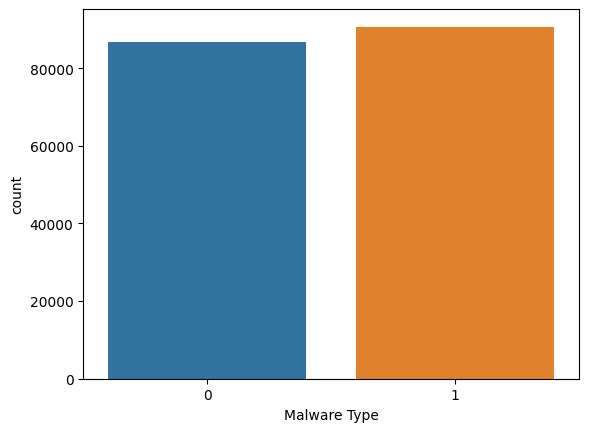

In [14]:
sns.countplot(x=df['Malware Type'])

In [15]:
print("Malware distribution from the Trojan Detection set:")
print(df['Malware Type'].value_counts())

Malware distribution from the Trojan Detection set:
Malware Type
1    90683
0    86799
Name: count, dtype: int64


In [16]:
# Create lists of the features and name the target

# Numerical features 
numerical_features = [
    "Flow Duration",
    "Total Backward Packets",
    "Total Fwd Packets",
    "Total Backward Packets",
    "Total Length of Fwd Packets",
    "Total Length of Bwd Packets",
    "Bwd Packet Length Max",
    "Bwd Packet Length Min",
    "Bwd Packet Length Mean",
    "Bwd Packet Length Std",
    "Malware Type"
]


# Based on exploratory data analysis (EDA), select the categorical features
categorical_features = ["ID",
                 "Source IP",
                 "Source Port",
                 "Destination IP",
                 "Destination Port",
                 "Protocol"              
]

model_features = numerical_features + categorical_features
model_target = ['Malware Type']

To review the numerical features, use the `value_counts()` function to get a view of the feature values in respective bins.

Flow Duration
(-119997.099, 11999911.8]     136565
(11999911.8, 23999821.6]       10933
(23999821.6, 35999731.4]        9980
(35999731.4, 47999641.2]        4061
(47999641.2, 59999551.0]        3178
(59999551.0, 71999460.8]        6164
(71999460.8, 83999370.6]        1794
(83999370.6, 95999280.4]        1559
(95999280.4, 107999190.2]       1404
(107999190.2, 119999100.0]      1844
Name: count, dtype: int64


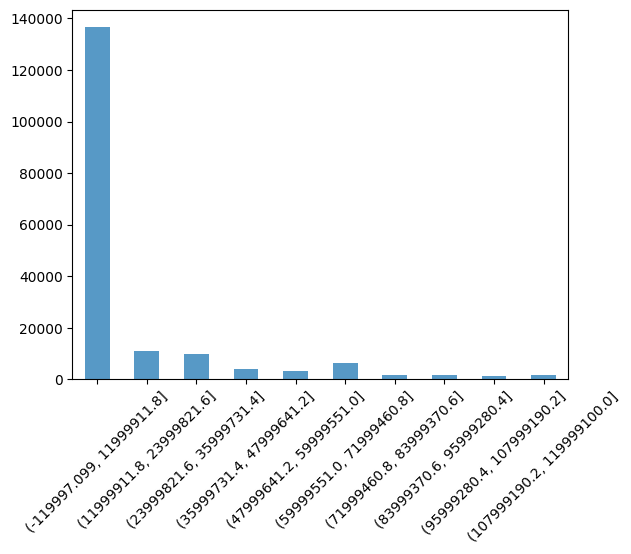

Total Backward Packets
(-12.952, 1295.1]     177374
(1295.1, 2590.2]          50
(2590.2, 3885.3]          21
(3885.3, 5180.4]          24
(5180.4, 6475.5]           3
(6475.5, 7770.6]           6
(7770.6, 9065.7]           2
(9065.7, 10360.8]          0
(10360.8, 11655.9]         0
(11655.9, 12951.0]         2
Name: count, dtype: int64


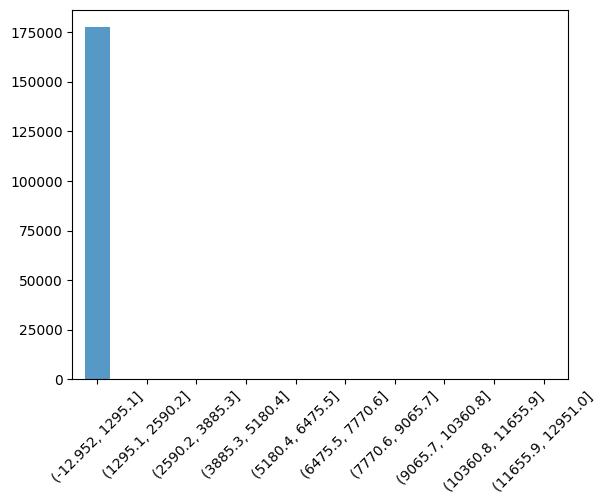

Total Fwd Packets
(-3.502, 451.1]     177387
(451.1, 901.2]          60
(901.2, 1351.3]         24
(1351.3, 1801.4]         7
(1801.4, 2251.5]         1
(2251.5, 2701.6]         1
(2701.6, 3151.7]         1
(3151.7, 3601.8]         0
(3601.8, 4051.9]         0
(4051.9, 4502.0]         1
Name: count, dtype: int64


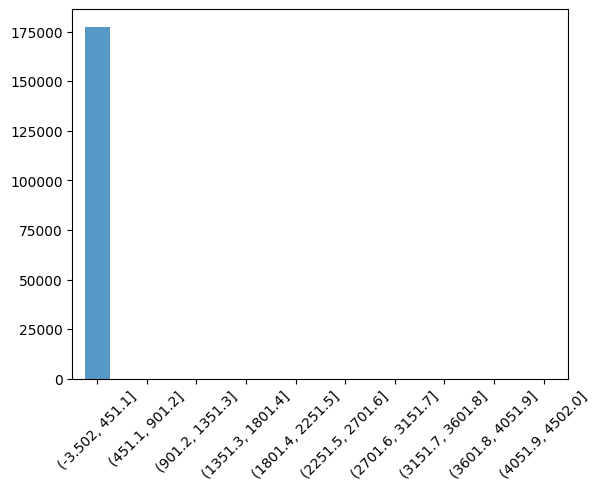

Total Backward Packets
(-12.952, 1295.1]     177374
(1295.1, 2590.2]          50
(2590.2, 3885.3]          21
(3885.3, 5180.4]          24
(5180.4, 6475.5]           3
(6475.5, 7770.6]           6
(7770.6, 9065.7]           2
(9065.7, 10360.8]          0
(10360.8, 11655.9]         0
(11655.9, 12951.0]         2
Name: count, dtype: int64


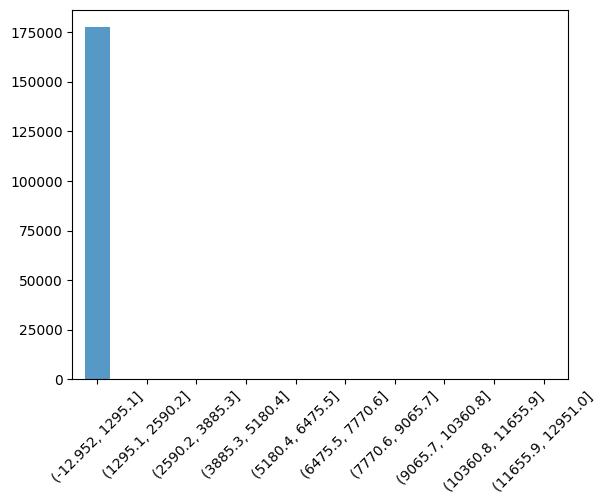

Total Length of Fwd Packets
(-846.615, 84661.4]     177380
(84661.4, 169322.8]         54
(169322.8, 253984.2]        17
(253984.2, 338645.6]        28
(338645.6, 423307.0]         0
(423307.0, 507968.4]         0
(507968.4, 592629.8]         0
(592629.8, 677291.2]         0
(677291.2, 761952.6]         1
(761952.6, 846614.0]         2
Name: count, dtype: int64


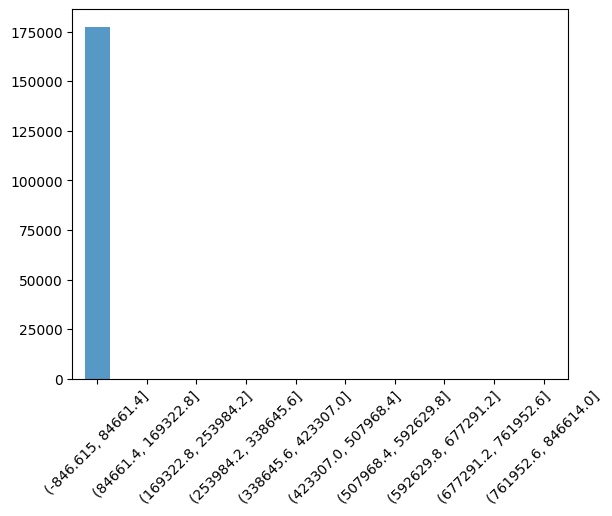

Total Length of Bwd Packets
(-18684.973, 1868497.2]     177375
(1868497.2, 3736994.4]          49
(3736994.4, 5605491.6]          22
(5605491.6, 7473988.8]          23
(7473988.8, 9342486.0]           3
(9342486.0, 11210983.2]          6
(11210983.2, 13079480.4]         2
(13079480.4, 14947977.6]         0
(14947977.6, 16816474.8]         0
(16816474.8, 18684972.0]         2
Name: count, dtype: int64


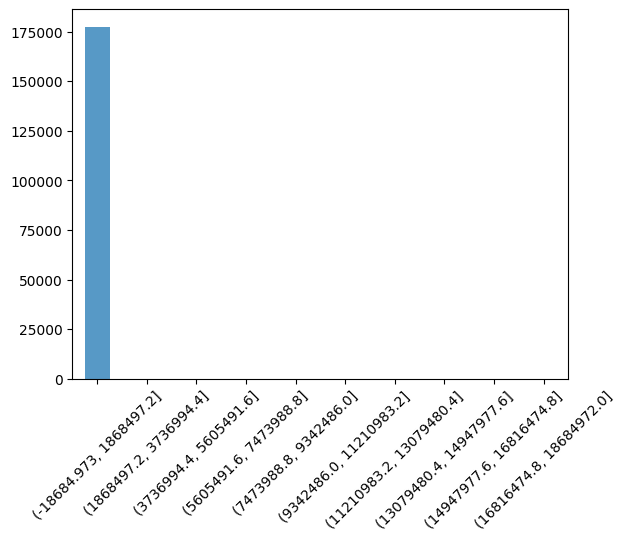

Bwd Packet Length Max
(-1.4609999999999999, 146.0]    117121
(146.0, 292.0]                   13302
(292.0, 438.0]                    4725
(438.0, 584.0]                    3197
(584.0, 730.0]                    1666
(730.0, 876.0]                     815
(876.0, 1022.0]                    796
(1022.0, 1168.0]                   447
(1168.0, 1314.0]                   477
(1314.0, 1460.0]                 34936
Name: count, dtype: int64


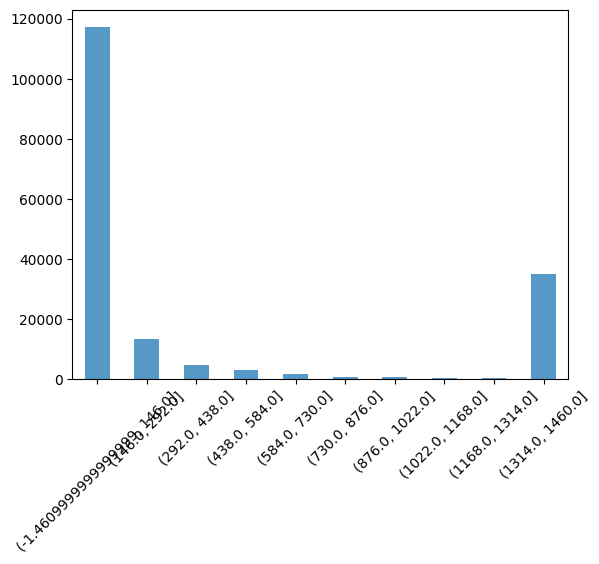

Bwd Packet Length Min
(-1.4609999999999999, 146.0]    168532
(146.0, 292.0]                    7402
(292.0, 438.0]                    1205
(438.0, 584.0]                      75
(584.0, 730.0]                     101
(730.0, 876.0]                      13
(876.0, 1022.0]                     20
(1022.0, 1168.0]                    14
(1168.0, 1314.0]                   105
(1314.0, 1460.0]                    15
Name: count, dtype: int64


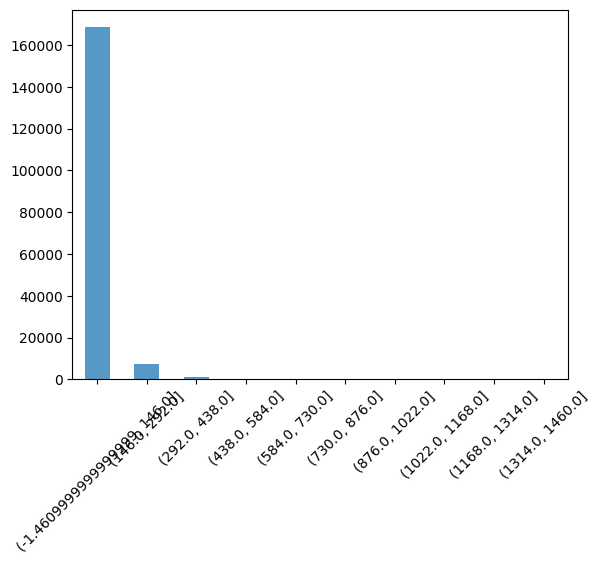

Bwd Packet Length Mean
(-1.4609999999999999, 146.0]    128155
(146.0, 292.0]                   14162
(292.0, 438.0]                    7369
(438.0, 584.0]                    7457
(584.0, 730.0]                    5274
(730.0, 876.0]                    3739
(876.0, 1022.0]                   2928
(1022.0, 1168.0]                  2662
(1168.0, 1314.0]                  3369
(1314.0, 1460.0]                  2367
Name: count, dtype: int64


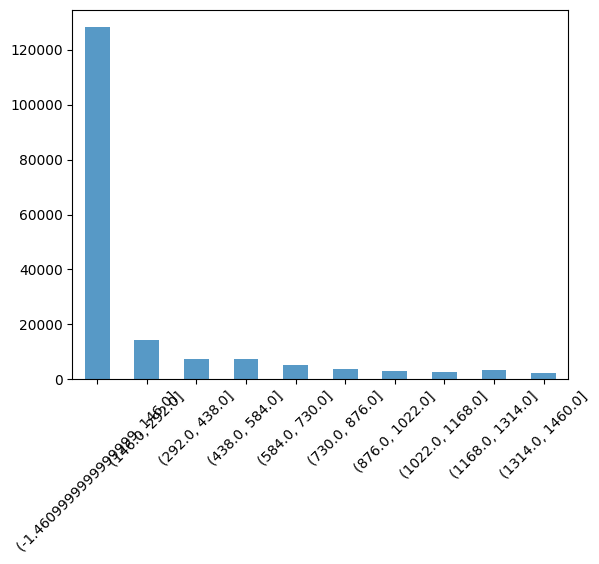

Bwd Packet Length Std
(-0.918, 91.712]      127981
(91.712, 183.423]       6992
(183.423, 275.135]      4221
(275.135, 366.847]      3902
(366.847, 458.559]      3990
(458.559, 550.27]       6332
(550.27, 641.982]      12320
(641.982, 733.694]     10687
(733.694, 825.406]      1045
(825.406, 917.117]        12
Name: count, dtype: int64


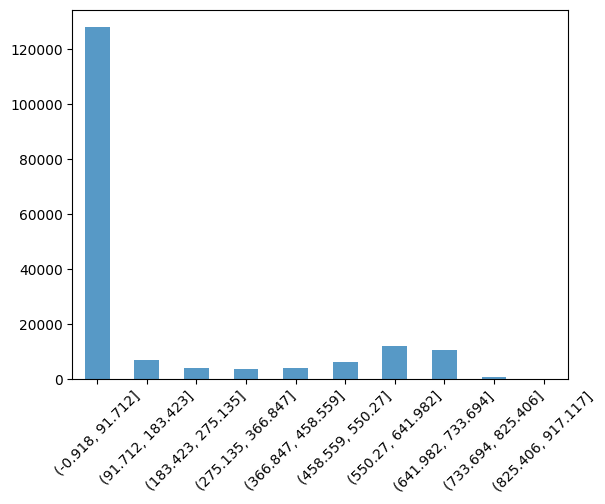

Malware Type
(-0.002, 0.1]    86799
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]       90683
Name: count, dtype: int64


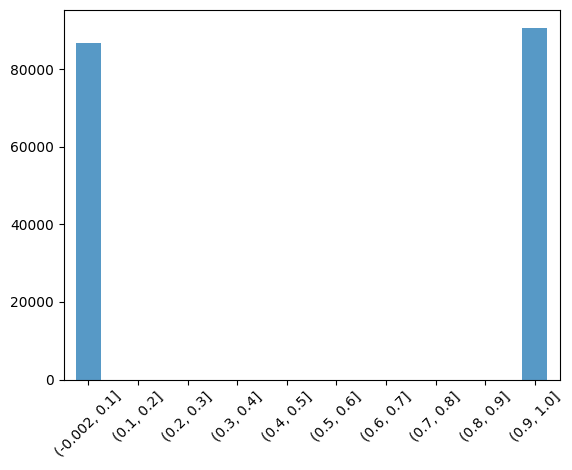

In [17]:
# Print and plot statistics for the numerical features
for c in numerical_features:
    # Print the name of the feature
    print(c)
    # Print the value counts in 10 bins for each feature
    print(df[c].value_counts(bins=10, sort=False))

    # Plot bar charts based on value_counts (alternative plot method)
    df[c].value_counts(bins=10, sort=False).plot(kind="bar", alpha=0.75, rot=45)
    plt.show()

In [18]:
for c in numerical_features:
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max() * 9 / 10].index
    df.drop(dropIndexes, inplace=True)

Flow Duration
(-107976.867, 10797888.6]    55832
(10797888.6, 21595775.2]      3594
(21595775.2, 32393661.8]      3104
(32393661.8, 43191548.4]      1770
(43191548.4, 53989435.0]      1414
(53989435.0, 64787321.6]      1341
(64787321.6, 75585208.2]       562
(75585208.2, 86383094.8]       308
(86383094.8, 97180981.4]       405
(97180981.4, 107978868.0]      387
Name: count, dtype: int64


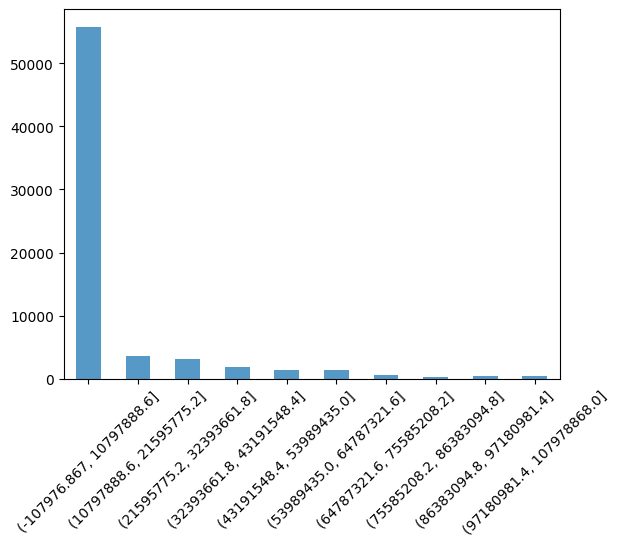

Total Backward Packets
(-0.196, 19.5]    68435
(19.5, 39.0]        182
(39.0, 58.5]         33
(58.5, 78.0]         20
(78.0, 97.5]          5
(97.5, 117.0]         0
(117.0, 136.5]        0
(136.5, 156.0]        1
(156.0, 175.5]       20
(175.5, 195.0]       21
Name: count, dtype: int64


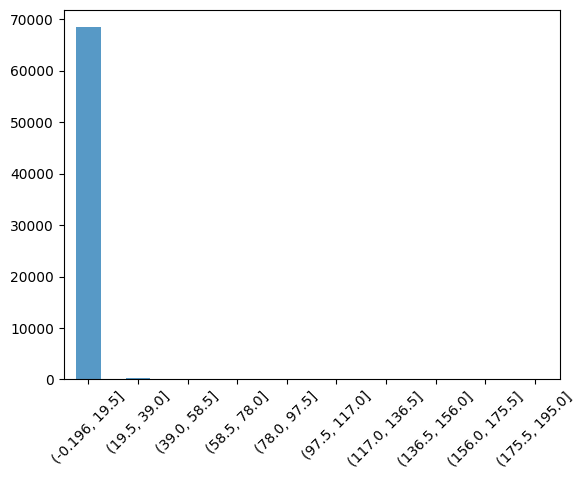

Total Fwd Packets
(0.78, 22.9]      68461
(22.9, 44.8]        159
(44.8, 66.7]         13
(66.7, 88.6]         39
(88.6, 110.5]         3
(110.5, 132.4]        0
(132.4, 154.3]        0
(154.3, 176.2]        0
(176.2, 198.1]        0
(198.1, 220.0]       42
Name: count, dtype: int64


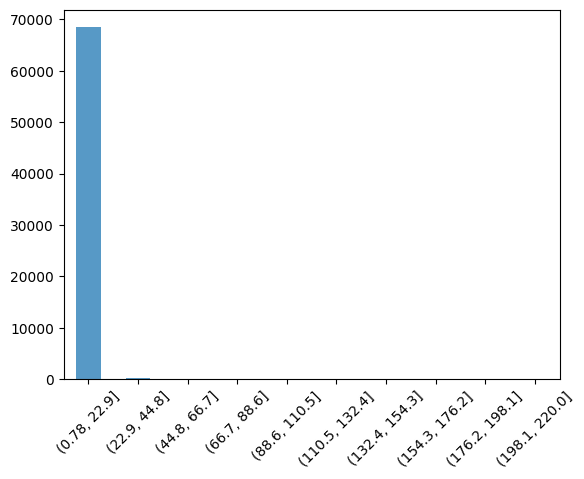

Total Backward Packets
(-0.196, 19.5]    68435
(19.5, 39.0]        182
(39.0, 58.5]         33
(58.5, 78.0]         20
(78.0, 97.5]          5
(97.5, 117.0]         0
(117.0, 136.5]        0
(136.5, 156.0]        1
(156.0, 175.5]       20
(175.5, 195.0]       21
Name: count, dtype: int64


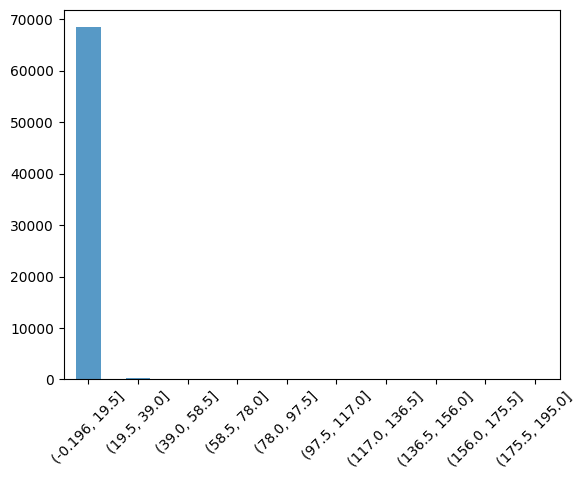

Total Length of Fwd Packets
(-261.957, 26195.6]     68626
(26195.6, 52391.2]          7
(52391.2, 78586.8]          5
(78586.8, 104782.4]        36
(104782.4, 130978.0]        1
(130978.0, 157173.6]        0
(157173.6, 183369.2]        0
(183369.2, 209564.8]        0
(209564.8, 235760.4]        0
(235760.4, 261956.0]       42
Name: count, dtype: int64


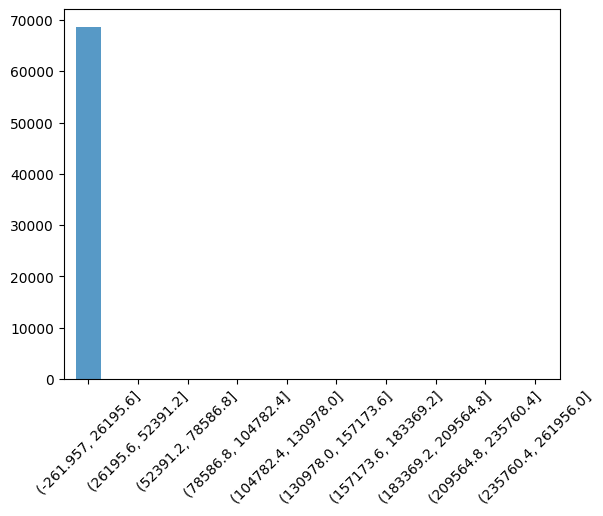

Total Length of Bwd Packets
(-71.88600000000001, 7188.5]    68690
(7188.5, 14377.0]                  24
(14377.0, 21565.5]                  1
(21565.5, 28754.0]                  0
(28754.0, 35942.5]                  0
(35942.5, 43131.0]                  1
(43131.0, 50319.5]                  0
(50319.5, 57508.0]                  0
(57508.0, 64696.5]                  0
(64696.5, 71885.0]                  1
Name: count, dtype: int64


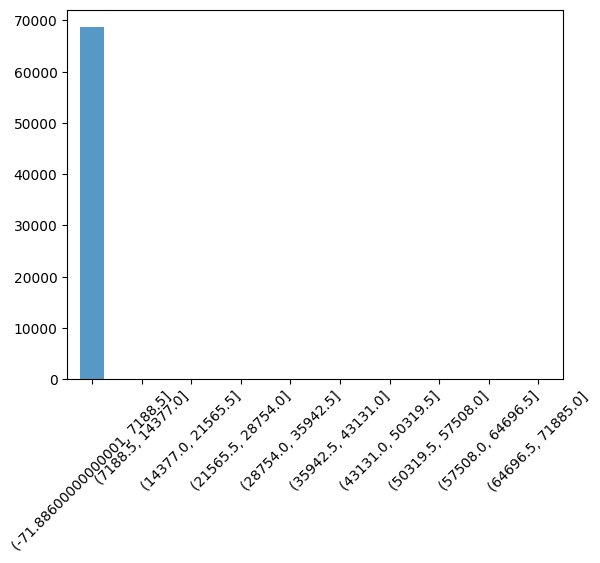

Bwd Packet Length Max
(-1.315, 131.4]     56929
(131.4, 262.8]       6388
(262.8, 394.2]       2032
(394.2, 525.6]       1238
(525.6, 657.0]        820
(657.0, 788.4]        262
(788.4, 919.8]        438
(919.8, 1051.2]       212
(1051.2, 1182.6]      177
(1182.6, 1314.0]      221
Name: count, dtype: int64


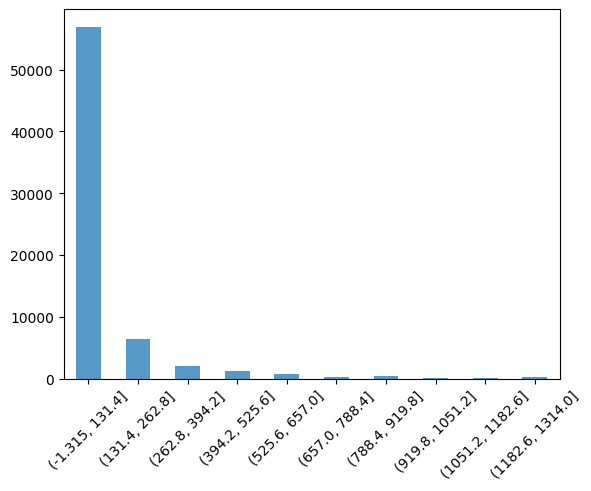

Bwd Packet Length Min
(-0.931, 93.0]    60169
(93.0, 186.0]      6495
(186.0, 279.0]     1444
(279.0, 372.0]      435
(372.0, 465.0]      156
(465.0, 558.0]        4
(558.0, 651.0]        4
(651.0, 744.0]        2
(744.0, 837.0]        1
(837.0, 930.0]        7
Name: count, dtype: int64


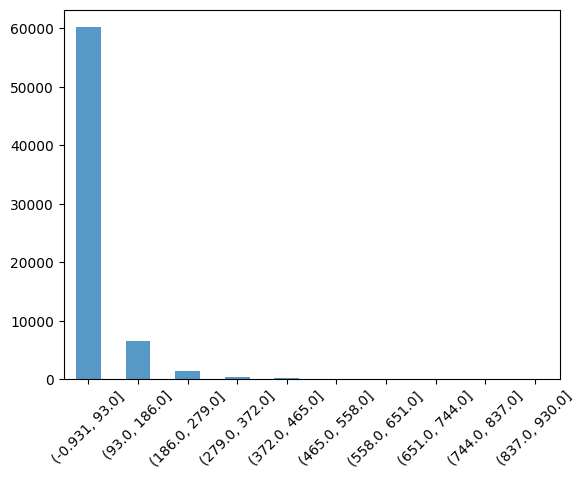

Bwd Packet Length Mean
(-0.983, 98.2]    57094
(98.2, 196.4]      8438
(196.4, 294.6]     2152
(294.6, 392.8]      776
(392.8, 491.0]      187
(491.0, 589.2]       40
(589.2, 687.4]       15
(687.4, 785.6]        3
(785.6, 883.8]        7
(883.8, 982.0]        5
Name: count, dtype: int64


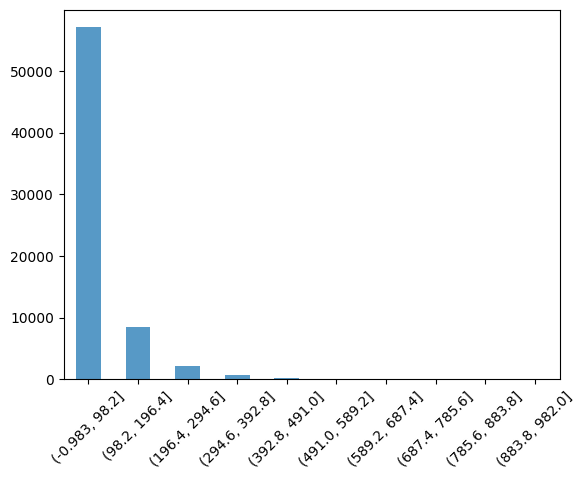

Bwd Packet Length Std
(-0.791, 78.984]      63279
(78.984, 157.968]      1468
(157.968, 236.951]     1821
(236.951, 315.935]      711
(315.935, 394.919]      522
(394.919, 473.903]      312
(473.903, 552.887]      391
(552.887, 631.871]      132
(631.871, 710.854]       64
(710.854, 789.838]       17
Name: count, dtype: int64


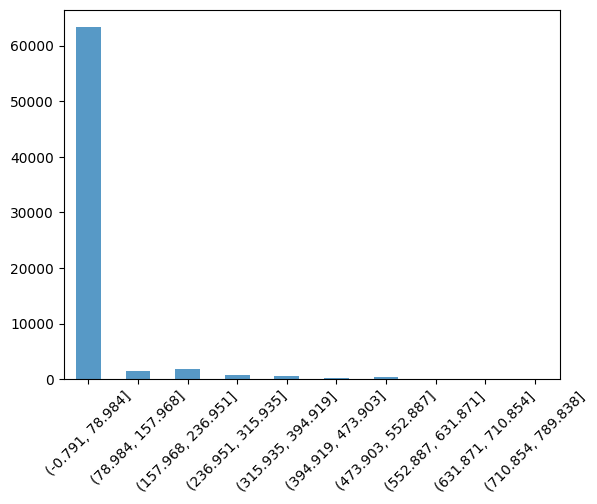

Malware Type
(-0.002, -0.0008]         0
(-0.0008, -0.0006]        0
(-0.0006, -0.0004]        0
(-0.0004, -0.0002]        0
(-0.0002, 0.0]        68717
(0.0, 0.0002]             0
(0.0002, 0.0004]          0
(0.0004, 0.0006]          0
(0.0006, 0.0008]          0
(0.0008, 0.001]           0
Name: count, dtype: int64


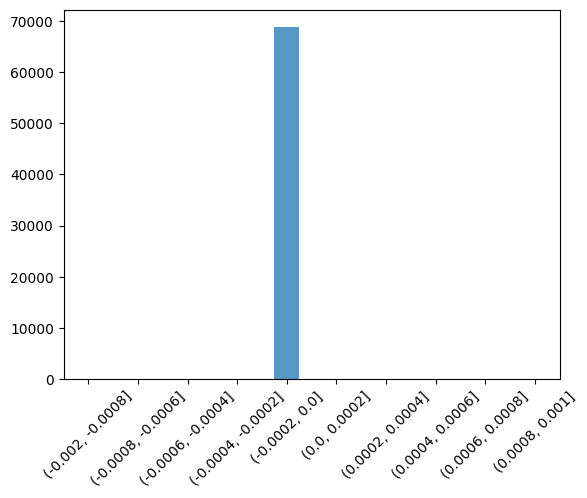

In [19]:
# Print and plot statistics for the numerical features
for c in numerical_features:
    # Print the name of the feature
    print(c)
    # Print the value counts in 10 bins for each feature
    print(df[c].value_counts(bins=10, sort=False))

    # Plot bar charts based on value_counts (alternative plot method)
    df[c].value_counts(bins=10, sort=False).plot(kind="bar", alpha=0.75, rot=45)
    plt.show()

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Data Processing</span></h1></div>

Next need to import and prepare the data.

In [24]:
X = df.drop(columns = "Malware Type")
X

ID      Source IP  Source Port   Destination IP  Destination Port  \
2        96676     10.42.0.42        37749        10.42.0.1                53   
7        98047     10.42.0.42        49387    66.231.239.96               443   
10      140308     10.42.0.42        47733   180.76.184.128                80   
14      114034  140.205.230.8           80       10.42.0.42             35291   
18      124498     10.42.0.42        64235        10.42.0.1                53   
...        ...            ...          ...              ...               ...   
177468   91851     10.42.0.42        42207  162.222.180.126              5001   
177472  143060     10.42.0.42        53462   219.142.78.217                80   
177475  105519     10.42.0.42        35679    58.63.236.212               443   
177476  133197     10.42.0.42        53964    106.39.169.66                80   
177481  167491     10.42.0.42        47389    104.254.66.16                80   

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
2             17        1023244                  1                       1   
7              6            473                  1                       2   
10             6         518061                  3                       3   
14             6              7                  2                       0   
18            17           1482                  1                       1   
...          ...            ...                ...                     ...   
177468         6         995618                  2                       0   
177472         6         580718                  1                       1   
177475         6        7834829                  2                       0   
177476         6          58330                  2                       0   
177481         6         360889                  2                       0   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
2                                30                          179   
7                                46                           31   
10                              551                            0   
14                                0                            0   
18                               36                          246   
...                             ...                          ...   
177468                            0                            0   
177472                            0                            0   
177475                            0                            0   
177476                            0                            0   
177481                            0                            0   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
2                         179                    179                   179.0   
7                          31                      0                    15.5   
10                          0                      0                     0.0   
14                          0                      0                     0.0   
18                        246                    246                   246.0   
...                       ...                    ...                     ...   
177468                      0                      0                     0.0   
177472                      0                      0                     0.0   
177475                      0                      0                     0.0   
177476                      0                      0                     0.0   
177481                      0                      0                     0.0   

        Bwd Packet Length Std  
2                     0.00000  
7                    21.92031  
10                    0.00000  
14                    0.00000  
18                    0.00000  
...                       ...  
177468                0.00000  
177472                0.00000  
177475                0.00000  
1774

In [25]:
y = df['Malware Type']
y

2         0
7         0
10        0
14        0
18        0
         ..
177468    0
177472    0
177475    0
177476    0
177481    0
Name: Malware Type, Length: 68717, dtype: int64

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Create training and test datasets</span></h3></div>


As part of data preparation, the dataset is split into training and test subsets by using sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

For this notebook, you will use 80 percent of the data for the training set and 20 percent for the test set. Determine the best split based on the size of your dataset.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)

In [28]:
X_train

ID        Source IP  Source Port  Destination IP  Destination Port  \
16398   90795       10.42.0.42        36858    121.12.98.63                80   
26412  110880       10.42.0.42        40208  209.85.232.188              5228   
23323   93954       10.42.0.42        38024   220.181.7.190               443   
66023  114733       10.42.0.42        32098       10.42.0.1                53   
68689  133010       10.42.0.42        39973       10.42.0.1                53   
...       ...              ...          ...             ...               ...   
52087  168226       10.42.0.42        18959       10.42.0.1                53   
42622  127216       10.42.0.42        30697       10.42.0.1                53   
72628  113655  180.149.138.210           80      10.42.0.42             58583   
25348  152299       10.42.0.42        59892  172.217.12.138               443   
24213  146108     23.9.107.127          443      10.42.0.42             41025   

       Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
16398         6       56980741                  3                       1   
26412         6       81991576                  6                       6   
23323         6        1503938                  2                       0   
66023        17        1177023                  1                       1   
68689        17           1570                  1                       1   
...         ...            ...                ...                     ...   
52087        17          47417                  1                       1   
42622        17         608843                  1                       1   
72628         6          22297                  4                       3   
25348         6            261                  2                       0   
24213         6         226995                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
16398                            0                            0   
26412                         3180                         1014   
23323                            0                            0   
66023                           36                          141   
68689                           30                          207   
...                            ...                          ...   
52087                           37                          118   
42622                           37                          182   
72628                         5840                            0   
25348                            0                            0   
24213                           23                            0   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
16398                      0                      0                     0.0   
26412                    338                      0                   169.0   
23323                      0                      0                     0.0   
66023                    141                    141                   141.0   
68689                    207                    207                   207.0   
...                      ...                    ...                     ...   
52087                    118                    118                   118.0   
42622                    182                    182                   182.0   
72628                      0                      0                     0.0   
25348                      0                      0                     0.0   
24213                      0                      0                     0.0   

       Bwd Packet Length Std  
16398               0.000000  
26412             185.130224  
23323               0.000000  
66023               0.000000  
68689               0.000000  
...                      ...  
52087               0.000000  
42622               0.000000  
72628               0.000000  
25348               0.000000  
24213             

In [29]:
X_test

ID        Source IP  Source Port   Destination IP  \
86996   107703  113.108.216.233           80       10.42.0.42   
21683   102974       10.42.0.42        42245  123.125.115.164   
67534   173789      10.42.0.211        50206  180.163.255.159   
82919    91838       10.42.0.42        46921    119.146.74.33   
81692   148267   172.217.12.163          443       10.42.0.42   
...        ...              ...          ...              ...   
112400  139471       10.42.0.42        62542        10.42.0.1   
128515   98099       10.42.0.42        40247  180.149.136.194   
50100   126367       10.42.0.42         7585        10.42.0.1   
33107   171766       10.42.0.42        41471  203.205.147.229   
43336   118570       10.42.0.42        60346   180.76.150.180   

        Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
86996              56371         6        2999310                  2   
21683                443         6         650960                  3   
67534                443         6           4816                  2   
82919                443         6       49874297                  2   
81692              51772         6          47168                  1   
...                  ...       ...            ...                ...   
112400                53        17          31122                  1   
128515               443         6              5                  1   
50100                 53        17         548127                  1   
33107                 80         6         461643                  5   
43336                 80         6         524116                  3   

        Total Backward Packets  Total Length of Fwd Packets  \
86996                        1                          374   
21683                        0                            0   
67534                        0                            0   
82919                        0                            0   
81692                        2                            0   
...                        ...                          ...   
112400                       1                           37   
128515                       1                           31   
50100                        1                           30   
33107                        3                          559   
43336                        4                          559   

        Total Length of Bwd Packets  Bwd Packet Length Max  \
86996                             0                      0   
21683                             0                      0   
67534                             0                      0   
82919                             0                      0   
81692                             0                      0   
...                             ...                    ...   
112400                           53                     53   
128515                            0                      0   
50100                            76                     76   
33107                          1145                   1145   
43336                           831                    831   

        Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  
86996                       0                0.000000               0.000000  
21683                       0                0.000000               0.000000  
67534                       0                0.000000               0.000000  
82919                       0                0.000000               0.000000  
81692                       0                0.000000               0.000000  
...                       ...                     ...                    ...  
112400                     53               53.000000               0.000000  
128515                      0                0.000000               0.000000  
50100                      76               76.000000               0.000000  
33107                       0              381.666667             661.0660

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Process the data with a pipeline and ColumnTransformer</span></h3></div>

In a typical ML workflow, you need to apply data transformations, such as imputation and scaling, at least twice: first on the training dataset by using <span style="color:red"><b>.fit()</b></span> and <span style="color:red"><b><span>.transform()</b></span> when preparing the data to train the model, and then by using <span style="color:red"><b><span>.transform()</b></span> on any new data that you want to predict on (validation or test). Sklearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is a tool that simplifies this process by enforcing the implementation and order of data processing steps, being important for reproducibility. In other words, all the data is transformed the same way each time that you process any part of it.

In this section, you will build separate pipelines to handle the numerical, and categorical features. Then, you will combine them into a composite pipeline along with an estimator. To do this, you will use a [LogisticRegression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

You will need multiple pipelines to ensure that all the data is handled correctly:

* __Numerical features pipeline:__ Impute missing values with the mean by using sklearn's SimpleImputer, followed by a MinMaxScaler. If different processing is desired for different numerical features, different pipelines should be built as described for the text features pipeline. See the <span style="color:red"><b><span>numerical_processor</b></span> in the following code cell.

* __Categoricals pipeline:__ Impute with a placeholder value (this won't have an effect because you already encoded the 'nan' values), and encode with sklearn's OneHotEncoder. If computing memory is an issue, it is a good idea to check the number of unique values for the categoricals to get an estimate of how many dummy features one-hot encoding will create. Note the <span style="color:red"><b><span>handle_unknown</b></span> parameter, which tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation or test set that was not present in the initial training set. See the <span style="color:red"><b><span>categorical_processor</b></span> in the following code cell.

Finally, the selective preparations of the dataset features are then put together into a collective ColumnTransformer, which is used in a pipeline along with an estimator. This ensures that the transforms are performed automatically in all situations. This includes on the raw data when fitting the model, when making predictions, when evaluating the model on a validation dataset through cross-validation, or when making predictions on a test dataset in the future.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline(
    [
        ("num_imputer", SimpleImputer(strategy="mean")),
        (
            "num_scaler",
            MinMaxScaler(),
        ),  # Shown in case it is needed. Not a must with decision trees.
    ]
)

# Preprocess the categorical features
categorical_processor = Pipeline(
    [
        (
            "cat_imputer",
            SimpleImputer(strategy="constant", fill_value="missing"),
        ),  # Shown in case it is needed. No effect because you already imputed with 'nan' strings.
        (
            "cat_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        ),  # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
    ]
)


# Combine all data preprocessors (add more if you choose to define more)
# For each processor/step, specify: a name, the actual process, and the features to be processed.
data_processor = ColumnTransformer(
    [
        ("numerical_processing", numerical_processor, numerical_features),
        ("categorical_processing", categorical_processor, categorical_features),
        
    ]
)

# Visualize the data processing pipeline
from sklearn import set_config

set_config(display="diagram")
data_processor

ColumnTransformer(transformers=[('numerical_processing',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('num_scaler',
                                                  MinMaxScaler())]),
                                 ['Flow Duration', 'Total Backward Packets',
                                  'Total Fwd Packets', 'Total Backward Packets',
                                  'Total Length of Fwd Packets',
                                  'Total Length of Bwd Packets',
                                  'Bwd Packet Length Max',
                                  'Bwd Packet Length Min',
                                  'Bwd Packet Length Mean',
                                  'Bwd Packet Length Std', 'Malware Type']),
                                ('categorical_processing',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ID', 'Source IP', 'Source Port',
                                  'Destination IP', 'Destination Port',
                                  'Protocol'])])

The data is now prepared, and you are ready to create a classifier.

---
<div class="alert alert-block alert-success">
    <h1><span style="color:blue">Train a classifier</span></h1></div>

To train a logistic regression model, you will use sklearn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 


<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Adoption Classification</span></h3></div>

   (**Outcome Type**) is the outcome of adoption:<span style="color:red"><b> 1 for Trojan and 0 for not Benign.</b></span>

<center><img src="images/logistic_function.png" alt="drawing" width="800" style="background-color:white; padding:1em;" /></center>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline with all desired data transformers, along with an estimator
# Later, you can set/reach the parameters by using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline(
    [
        ("data_processing", data_processor),
        (
            "lg",
            LogisticRegression(
                solver="liblinear", penalty="l1", C=0.001, class_weight={0: 1, 1: 20}
            ),
        ),
    ]
)

# Visualize the pipeline
# This will be helpful especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config

set_config(display="diagram")
pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Flow Duration',
                                                   'Total Backward Packets',
                                                   'Total Fwd Packets',
                                                   'Total Backward Packets',
                                                   'Total Length of Fwd '
                                                   'Packets',
                                                   'Total Length of Bwd '
                                                   'Packets',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Packet Length Min',
                                                   '...
                                                   'Malware Type']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ID', 'Source IP',
                                                   'Source Port',
                                                   'Destination IP',
                                                   'Destination Port',
                                                   'Protocol'])])),
                ('lg',
                 LogisticRegression(C=0.001, class_weight={0: 1, 1: 20},
                                    penalty='l1', solver='liblinear'))])

Finally, train the classifier with <span style="color:red"><b>.fit()</b></span> on the training dataset. 

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipeline.fit(X_train, y_train).score(X_test, y_test)
# An estimator's parameter can be set using '__' syntax

pipeline.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.76

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Data Modeling</span></h1></div>

---
<div class="alert alert-block alert-success">
<h2><span style="color:blue">Bagging</span></h2></div>


   (**Malware Type**) is the outcome of adoption:<span style="color:red"><b> 1 for trojan and 0 for benign.</b></span>

<center><img src="Hyperparameter_Optimization_using_Grid_Search.svg.png" alt="drawing" width="800" style="background-color:white; padding:1em;" /></center>

In this section, you will build your first ensemble model by using the bootstrap aggregating, or bagging, approach. With this approach, you randomly draw multiple data subsets from the training set (with replacement) and train one model for each subset.

The first approach will use multiple trees in the bagging model.

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Data processing with a pipeline and a bagging ColumnTransformer</span></h3></div>


You need to use different pipelines to handle the numerical, categorical, and text features. Then, you will combine them into a composite pipeline along with an estimator. To do this, you will use a [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline(
    [
        (
            "num_scaler",
            MinMaxScaler(),
        )  # Shown in case it is needed. Not a must with decision trees.
    ]
)

# Preprocess the categorical features
# handle_unknown tells it to ignore (rather than throw an error for) any value
# that was not present in the initial training set.

#categorical_processor = Pipeline(
#    [("cat_encoder", OneHotEncoder(handle_unknown="ignore"))]
#)


# Combine all data preprocessors from above (add more if you choose to define more)
# For each processor/step, specify a name, the actual process, and the features to be processed
data_preprocessor = ColumnTransformer(
    [
        ("numerical_pre", numerical_processor, numerical_features),
        ("categorical_pre", categorical_processor, categorical_features)
    ]
)

### PIPELINE ###
################

# Pipeline with all desired data transformers, along with an estimator
# Later, you can set/reach the parameters by using the names issued - for hyperparameter tuning, for example

#####################################################
### Notice the pipeline using a BaggingClassifier ###
#####################################################
pipeline = Pipeline(
    [
        ("data_preprocessing", data_preprocessor),
        (
            "bg",
            BaggingClassifier(
                DecisionTreeClassifier(max_depth=25),  # Each tree has max_depth=25
                n_estimators=10,
            ),
        ),
    ]
)  # Use 10 trees

# Visualize the pipeline
# This will be helpful especially when building more complex pipelines,
# stringing together multiple preprocessing steps
from sklearn import set_config

set_config(display="diagram")
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Flow Duration',
                                                   'Total Backward Packets',
                                                   'Total Fwd Packets',
                                                   'Total Backward Packets',
                                                   'Total Length of Fwd '
                                                   'Packets',
                                                   'Total Length of Bwd '
                                                   'Packets',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Packet Length Min',
                                                   'Bwd Packet Length Mean',
                                                   'Bwd Packet Length Std',
                                                   'Malware Type']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ID', 'Source IP',
                                                   'Source Port',
                                                   'Destination IP',
                                                   'Destination Port',
                                                   'Protocol'])])),
                ('bg',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=25)))])

Now you can fit the bagging model, and see the training and test scores.

In [58]:
# Get training data to train the pipeline
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipeline.fit(X_train, y_train).score(X_test, y_test)

# Use the fitted pipeline to make predictions on the training dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get testing data to test the pipeline
#X_test = test_data[model_features]
#y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the testing dataset
#test_predictions = pipeline.predict(X_test)
#print(confusion_matrix(y_test, test_predictions))
#print(classification_report(y_test, test_predictions))
#print("Accuracy (test):", accuracy_score(y_test, test_predictions))

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

<center><img src="Confusion Matrix.png" alt="drawing" width="500" style="background-color:white; padding:1em;" /></center>


Using a bagging classifier isn't difficult because it only requires updating one line of code.

Next, you will create a random forest model.

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Random forest</span></h1></div>


Now, you will try the second ensemble model: random forest. Random forest involves a similar ensemble process:
- Draw random subsets (with replacement) from the original dataset.
- Train individual trees with each subset.

However, a difference is that random forest uses a randomly selected feature subset for each tree. As a rule of thumb, pick the `sqrt(# features)` as the number of random features for each tree and don't use any other features.


The model is called in a similar way to the bagging method. You will replace the BaggingClassifier with a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) in the pipeline.

In [ ]:
### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline(
    [
        (
            "num_scaler",
            MinMaxScaler(),
        )  # Shown in case it is needed. Not a must with decision trees.
    ]
)

# Preprocess the categorical features
# handle_unknown tells it to ignore (rather than throw an error for) any value
# that was not present in the initial training set.

#categorical_processor = Pipeline(
#    [("cat_encoder", OneHotEncoder(handle_unknown="ignore"))]
#)

# Preprocess the text feature
text_processor_0 = Pipeline(
    [("text_vect_0", CountVectorizer(binary=True, max_features=150))]
)

# Combine all data preprocessors (add more if you choose to define more)
# For each processor/step, specify a name, the actual process, and the features to be processed
data_preprocessor = ColumnTransformer(
    [
        ("numerical_pre", numerical_processor, numerical_features),
#        ("categorical_pre", categorical_processor, categorical_features),
        ("text_pre_0", text_processor_0, text_features[0]),
    ]
)

### PIPELINE ###
################

# Pipeline with all desired data transformers, along with an estimator
# Later, you can set/reach the parameters by using the names issued - for hyperparameter tuning, for example

##########################################################
### Notice the pipeline using a RandomForestClassifier ###
##########################################################
pipeline = Pipeline(
    [
        ("data_preprocessing", data_preprocessor),
        (
            "rf",
            RandomForestClassifier(
                max_depth=25, n_estimators=100  # Each tree has max_depth=25
            ),
        ),
    ]
)  # Use 100 trees

# Visualize the pipeline
# This will be helpful especially when building more complex pipelines,
# stringing together multiple preprocessing steps
from sklearn import set_config

set_config(display="diagram")
pipeline

Now you can fit the random forest model, and see the training and test scores.

In [ ]:
# Get training data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the training dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get testing data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the testing dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">You can perform hyperparameter tuning on a random forest model.</p><br>
    <p style=" text-align: center; margin: auto;">In the following code cell, run a grid search with the random forest classifier using <code>param_grid={'rf__max_depth': [25, 30, 45]}</code>.</p><br>
    <p style=" text-align: center; margin: auto;">What is the best hyperparameter value after this run?</p>
    <br>
</div>

In [ ]:
# Write your code for grid search with param_grid={'rf__max_depth': [25, 30, 45]}

# Parameter grid for GridSearch

############### CODE HERE ###############

from scipy.stats import randint
# Parameter grid for GridSearch

param_grid = {
    'rf__max_depth': [25, 30, 45]
}


grid_search = GridSearchCV(
    pipeline,  # Base model
    param_grid,  # Parameters to try
    cv=5,  # Apply 5-fold cross validation
    verbose=1,  # Print summaryGridSearchCV
    n_jobs=-1,  # Use all available processors
)

# Fit the RandomizedSearch to the training data
grid_search.fit(X_train, y_train)


############## END OF CODE ##############

print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the training data
classifier.fit(X_train, y_train)

In [ ]:
# Get testing data to test the classifier
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Testing data going through the pipeline is first imputed
# (with means from the training set), scaled (with the min/max from the training data),
# and finally used to make predictions.
test_predictions = classifier.predict(X_test)

print("Model performance on the test set:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Boosting</span></h1></div>

The last ensemble model that you will try is boosting. This method builds multiple weak models sequentially. Each subsequent model attempts to boost performance overall by overcoming or reducing the errors of the previous model.

You will use sklearn's [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) in the pipeline.

In [ ]:
### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline(
    [
        (
            "num_scaler",
            MinMaxScaler(),
        )  # Shown in case it is needed. Not a must with decision trees.
    ]
)

# Preprocess the categorical features
# handle_unknown tells it to ignore (rather than throw an error for) any value
# that was not present in the initial training set.

#categorical_processor = Pipeline(
#    [("cat_encoder", OneHotEncoder(handle_unknown="ignore"))]
#)

# Preprocess the text feature
text_processor_0 = Pipeline(
    [("text_vect_0", CountVectorizer(binary=True, max_features=150))]
)

# Combine all data preprocessors (add more if you choose to define more)
# For each processor/step, specify a name, the actual process, and the features to be processed
data_preprocessor = ColumnTransformer(
    [
        ("numerical_pre", numerical_processor, numerical_features),
#        ("categorical_pre", categorical_processor, categorical_features),
        ("text_pre_0", text_processor_0, text_features[0]),
    ]
)

### PIPELINE ###
################

# Pipeline with all desired data transformers, along with an estimator
# Later, you can set/reach the parameters by using the names issued - for hyperparameter tuning, for example

##############################################################
### Notice the pipeline using a GradientBoostingClassifier ###
##############################################################
pipeline = Pipeline(
    [
        ("data_preprocessing", data_preprocessor),
        (
            "gbc",
            GradientBoostingClassifier(
                max_depth=10, n_estimators=100  # Each tree has max_depth=10
            ),
        ),
    ]
)  # Use 100 trees

# Visualize the pipeline
# This will be helpful especially when building more complex pipelines,
# stringing together multiple preprocessing steps
from sklearn import set_config

set_config(display="diagram")
pipeline

Now fit the model, and see the training and testing scores.

In [ ]:
# Get training data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the training dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get testing data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the testing dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Conclusion</span></h1></div>

This notebook provided an introduction to using Bagging, RandomForest, and GradientBoosting classifiers on the same dataset.

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Next Lab</span></h1></div>

In the next lab, you will be introduced to fairness and bias mitigation in ML by exploring different types of bias that are present in data and practicing how to build various documentation sheets.